<ipython-input-2-71dc5d9dda97>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Convertir "male"/"female" en 0/1
<ipython-input-2-71dc5d9dda97>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'] = label_encoder.fit_transform(data['Embarked'])


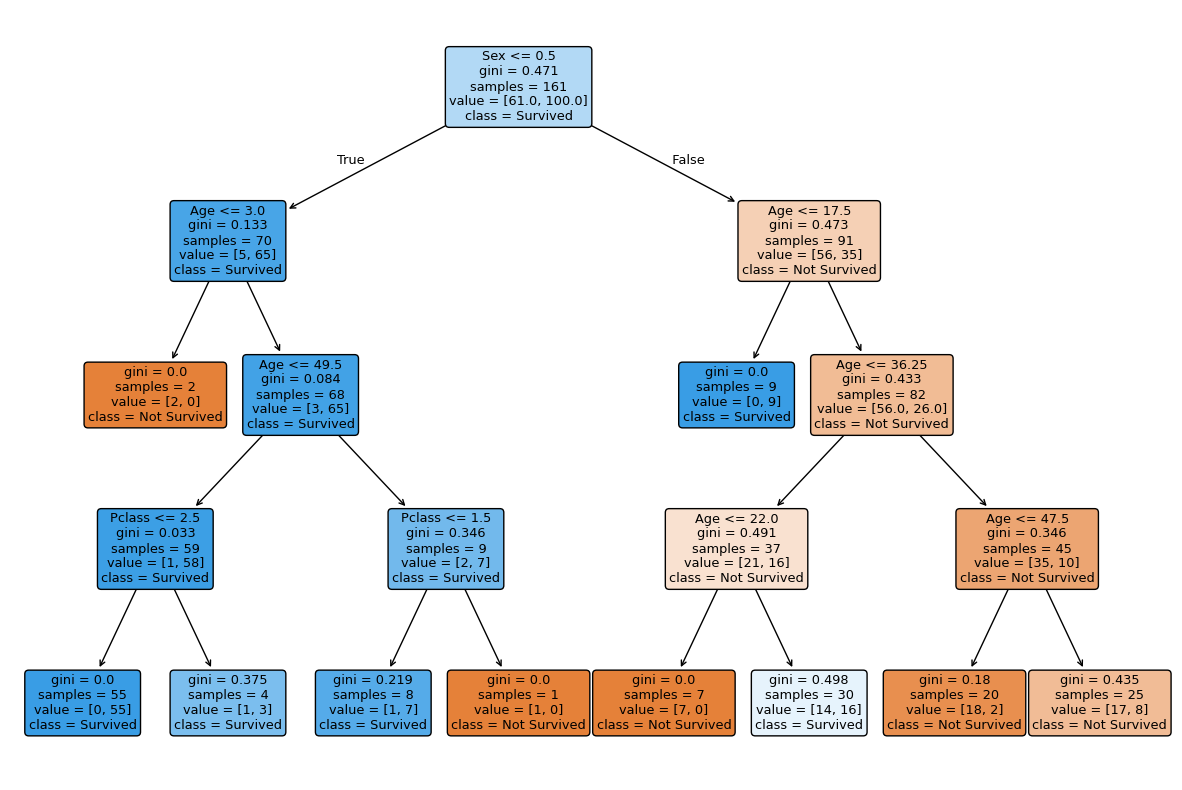

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Charger le fichier CSV
data = pd.read_csv('titanic.csv')

# Prétraitement des données (en supposant que le fichier contient des colonnes pertinentes comme "Age", "Pclass", etc.)
data = data.dropna()  # Supprime les lignes avec des valeurs manquantes

# Encodage des colonnes catégorielles si nécessaire
label_encoder = preprocessing.LabelEncoder()
if 'Sex' in data.columns:
    data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Convertir "male"/"female" en 0/1
if 'Embarked' in data.columns:
    data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

# Sélectionner les colonnes pour l'entraînement
features = ['Pclass', 'Age', 'Sex']  # Ajouter ou modifier selon les colonnes disponibles
if 'Survived' not in data.columns:
    raise ValueError("La colonne 'Survived' est manquante dans le fichier.")
X = data[features]
y = data['Survived']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer et entraîner le classifieur DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Visualiser l'arbre de décision
plt.figure(figsize=(15, 10))
plot_tree(
    clf,
    feature_names=features,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True
)
plt.show()
